In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**데이터셋 링크**
https://www.kaggle.com/datasets/pschale/mlb-pitch-data-20152018

In [3]:
bats = pd.read_csv("../00_data/baseball/atbats.csv")
games = pd.read_csv("../00_data/baseball/games.csv")
pitches = pd.read_csv("../00_data/baseball/pitches.csv")
players = pd.read_csv("../00_data/baseball/player_names.csv")
ejections = pd.read_csv("../00_data/baseball/ejections.csv")

In [4]:
print(bats.columns)
filtered_bats = bats[['ab_id', 'batter_id', 'pitcher_id', 'event']].copy()
filtered_bats

Index(['ab_id', 'batter_id', 'event', 'g_id', 'inning', 'o', 'p_score',
       'p_throws', 'pitcher_id', 'stand', 'top'],
      dtype='object')


,ab_id,batter_id,pitcher_id,event
0,2015000001,572761,452657,Groundout
1,2015000002,518792,452657,Double
2,2015000003,407812,452657,Single
3,2015000004,425509,452657,Strikeout
4,2015000005,571431,452657,Strikeout
...,...,...,...,...
740384,2018185570,543768,448802,Groundout
740385,2018185571,502517,623352,Strikeout
740386,2018185572,450314,623352,Flyout
740387,2018185573,595879,623352,Single


In [5]:
print(pitches.columns)
print(pitches['type_confidence'].unique())
all_pitch_types = pitches[['ab_id', 'pitch_type']].copy()
pitch_types = pitches[(pitches['code'] == 'X') | (pitches['code'] == 'D') | (pitches['code'] == 'E') | (pitches['code'] == 'H')][['ab_id', 'pitch_type']].copy()
pitch_types

Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0',
       'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'code', 'type', 'pitch_type',
       'event_num', 'b_score', 'ab_id', 'b_count', 's_count', 'outs',
       'pitch_num', 'on_1b', 'on_2b', 'on_3b'],
      dtype='object')
[2.    0.778 0.648 ... 0.304 0.234 1.392]


,ab_id,pitch_type
5,2.015000e+09,FF
7,2.015000e+09,FC
10,2.015000e+09,FF
20,2.015000e+09,FC
24,2.015000e+09,FC
...,...,...
2867129,2.018186e+09,FF
2867132,2.018186e+09,SL
2867140,2.018186e+09,FF
2867149,2.018186e+09,SL


In [6]:
result = pd.merge(filtered_bats, pitch_types, on='ab_id')
all_result = pd.merge(filtered_bats, all_pitch_types, on='ab_id')
result

,ab_id,batter_id,pitcher_id,event,pitch_type
0,2015000001,572761,452657,Groundout,FF
1,2015000002,518792,452657,Double,FC
2,2015000003,407812,452657,Single,FF
3,2015000006,451594,425794,Double,FC
4,2015000007,624585,425794,Groundout,FC
...,...,...,...,...,...
519097,2018185569,606115,448802,Single,FF
519098,2018185570,543768,448802,Groundout,SL
519099,2018185572,450314,623352,Flyout,FF
519100,2018185573,595879,623352,Single,SL


In [7]:
# # 타자 아이디 기준으로 병합
# result_with_name = pd.merge(result, players, left_on='batter_id', right_on='id')
# result_with_name = result_with_name.rename(columns={'first_name':'batter_first_name', 'last_name':'batter_last_name'}).drop(columns=['id'])

# # 투수 아이디 기준으로 병합
# result_with_name = pd.merge(result_with_name, players, left_on='pitcher_id', right_on='id')
# result_with_name = result_with_name.rename(columns={'first_name':'pitcher_first_name', 'last_name':'pitcher_last_name'}).drop(columns=['id'])

# result_with_name

In [8]:
print(pitches.columns)
filtered_pitches = pitches[['ab_id', 'start_speed', 'end_speed', 'spin_rate']]
filtered_pitches = pd.merge(all_result, filtered_pitches, on='ab_id')
filtered_pitches

Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0',
       'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'code', 'type', 'pitch_type',
       'event_num', 'b_score', 'ab_id', 'b_count', 's_count', 'outs',
       'pitch_num', 'on_1b', 'on_2b', 'on_3b'],
      dtype='object')


,ab_id,batter_id,pitcher_id,event,pitch_type,start_speed,end_speed,spin_rate
0,2015000001,572761,452657,Groundout,FF,92.9,84.1,2305.052
1,2015000001,572761,452657,Groundout,FF,92.8,84.1,2689.935
2,2015000001,572761,452657,Groundout,FF,94.1,85.2,2647.972
3,2015000001,572761,452657,Groundout,FF,91.0,84.0,1289.590
4,2015000001,572761,452657,Groundout,FF,75.4,69.6,1374.569
...,...,...,...,...,...,...,...,...
13730633,2018185574,519203,623352,Flyout,FF,95.8,87.7,2354.885
13730634,2018185574,519203,623352,Flyout,FF,97.7,89.5,2262.907
13730635,2018185574,519203,623352,Flyout,FF,97.3,89.6,2514.010
13730636,2018185574,519203,623352,Flyout,FF,95.9,88.6,2318.775


In [9]:
def get_id(first, last):
  first_filtered = players[players['first_name'] == first]
  last_filtered = first_filtered[first_filtered['last_name'] == last]
  return last_filtered['id'].values[0]

rhj_id = get_id('Hyun-Jin', 'Ryu')
jd_id = get_id('Jacob', 'deGrom')
print(rhj_id, jd_id)

547943 594798


In [10]:
# 2015~2018 류현진의 투구 내용
player_filtered_pitches = filtered_pitches[filtered_pitches['pitcher_id'] == rhj_id]
player_filtered_pitches

,ab_id,batter_id,pitcher_id,event,pitch_type,start_speed,end_speed,spin_rate
5131499,2016098062,425834,547943,Home Run,FF,89.8,82.6,2233.033
5131500,2016098062,425834,547943,Home Run,FF,91.2,83.7,3002.172
5131501,2016098062,425834,547943,Home Run,FF,90.2,82.8,2424.572
5131502,2016098062,425834,547943,Home Run,FF,91.4,84.5,2237.729
5131503,2016098062,425834,547943,Home Run,FF,85.6,79.3,955.725
...,...,...,...,...,...,...,...,...
13672125,2018182437,460026,547943,Groundout,FF,90.9,82.2,1897.669
13672126,2018182437,460026,547943,Groundout,FF,83.1,76.3,1293.915
13672127,2018182437,460026,547943,Groundout,CH,90.1,82.4,1838.625
13672128,2018182437,460026,547943,Groundout,CH,90.9,82.2,1897.669


In [11]:
# player_filtered_pitches['pitch_type'].unique() # ['FF', 'SL', 'CU', 'CH', 'FT', 'IN', 'FC', nan, 'EP']
# pitch_types['pitch_type'].unique() #['FF', 'FC', 'FT', 'SI', 'CH', 'SL', 'CU', 'KC', nan, 'FO', 'FS', 'KN', 'EP', 'UN', 'FA', 'SC', 'PO']

label = player_filtered_pitches['pitch_type'].unique()
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'skyblue', 'orange', 'black', 'cyan']

list(player_filtered_pitches['pitch_type'].value_counts().index)

['FF', 'CH', 'FC', 'CU', 'FT', 'SL', 'IN', 'EP']

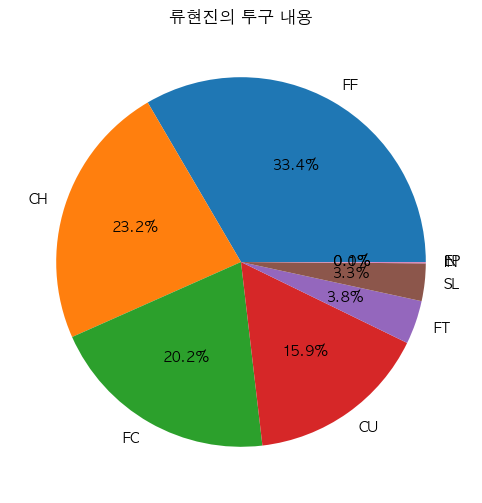

In [12]:
labels = list(player_filtered_pitches['pitch_type'].value_counts().index)

plt.figure(figsize=(10, 6))
plt.rc("font", family="AppleGothic")

plt.pie(player_filtered_pitches['pitch_type'].value_counts(), labels = labels, autopct='%.1f%%')
plt.title('류현진의 투구 내용')
plt.show()


## 2.

In [13]:
print(pitches.columns)
filtered_pitches = pitches[['ab_id', 'start_speed', 'end_speed', 'spin_rate']]
filtered_pitches = pd.merge(result, filtered_pitches, on='ab_id')
filtered_pitches

Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0',
       'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'code', 'type', 'pitch_type',
       'event_num', 'b_score', 'ab_id', 'b_count', 's_count', 'outs',
       'pitch_num', 'on_1b', 'on_2b', 'on_3b'],
      dtype='object')


,ab_id,batter_id,pitcher_id,event,pitch_type,start_speed,end_speed,spin_rate
0,2015000001,572761,452657,Groundout,FF,92.9,84.1,2305.052
1,2015000001,572761,452657,Groundout,FF,92.8,84.1,2689.935
2,2015000001,572761,452657,Groundout,FF,94.1,85.2,2647.972
3,2015000001,572761,452657,Groundout,FF,91.0,84.0,1289.590
4,2015000001,572761,452657,Groundout,FF,75.4,69.6,1374.569
...,...,...,...,...,...,...,...,...
1755674,2018185573,595879,623352,Single,SL,83.9,78.2,608.594
1755675,2018185574,519203,623352,Flyout,FF,97.7,89.5,2262.907
1755676,2018185574,519203,623352,Flyout,FF,97.3,89.6,2514.010
1755677,2018185574,519203,623352,Flyout,FF,95.9,88.6,2318.775


In [14]:
player_id = get_id('Aaron', 'Judge')
batter_result = result[result['batter_id'] == player_id]

batter_result = batter_result[['batter_id', 'pitch_type', 'event']].drop(columns=['batter_id'])
batter_result

,pitch_type,event
224846,CH,Home Run
224860,CH,Single
224870,FT,Pop Out
225697,FT,Home Run
225727,SI,Grounded Into DP
...,...,...
517080,FF,Flyout
517098,CU,Single
517122,FF,Home Run
518656,CH,Groundout


In [38]:
batter_result.to_csv("../00_data/batter_result.csv")

In [55]:
# Group the data by 'pitch_type' and 'event' to count occurrences of each combination
combination_counts = batter_result.groupby(['pitch_type', 'event']).size().reset_index(name='count')
combination_counts


,pitch_type,event,count
0,CH,Double,3
1,CH,Field Error,1
2,CH,Fielders Choice Out,1
3,CH,Flyout,10
4,CH,Forceout,2
...,...,...,...
94,SL,Home Run,8
95,SL,Lineout,4
96,SL,Pop Out,10
97,SL,Sac Fly,3


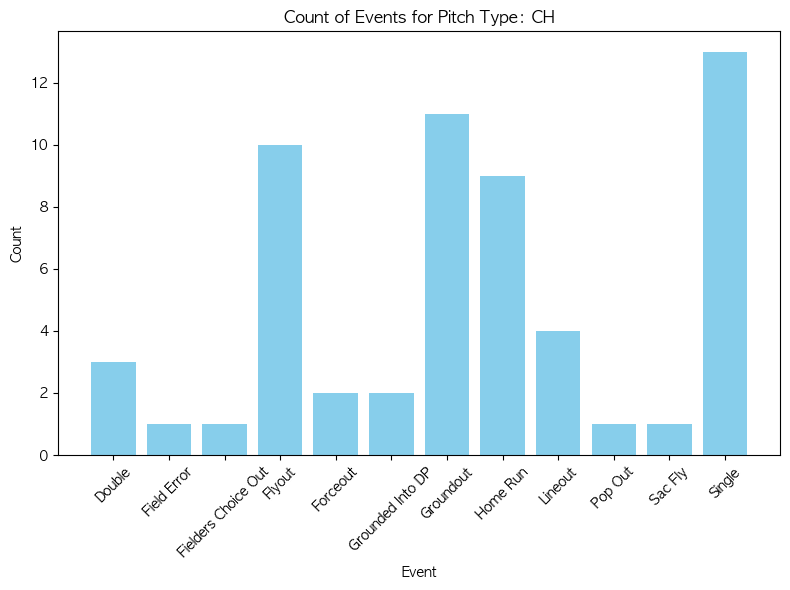

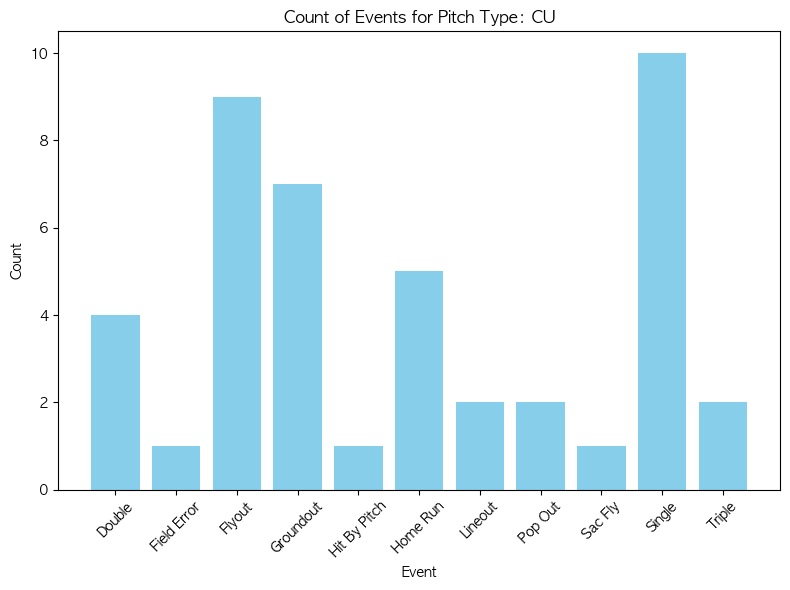

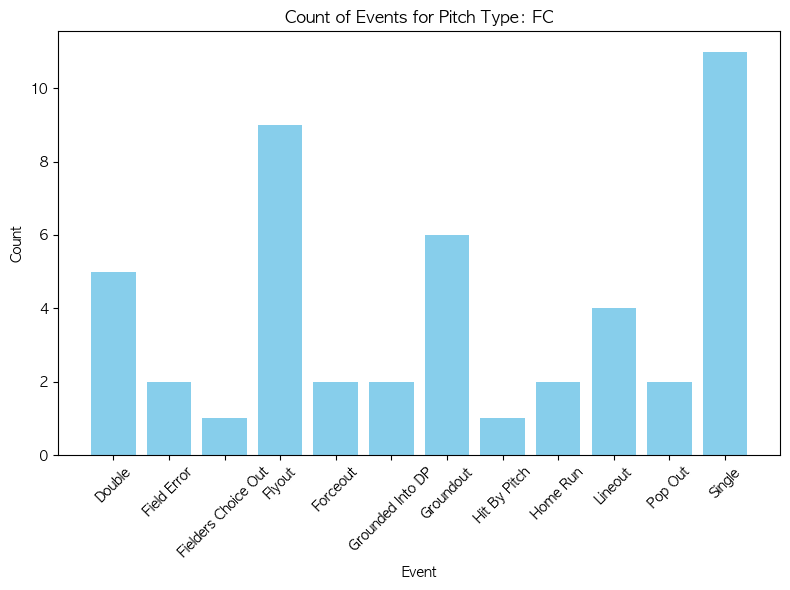

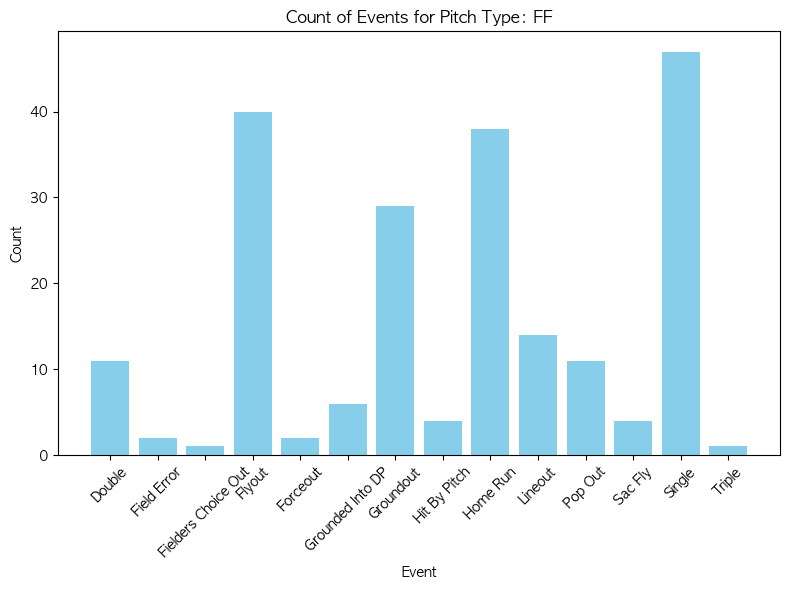

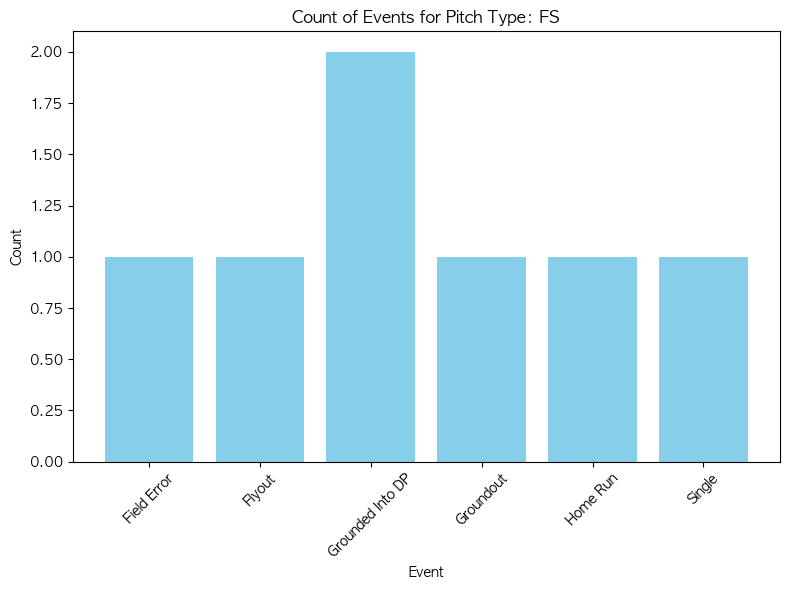

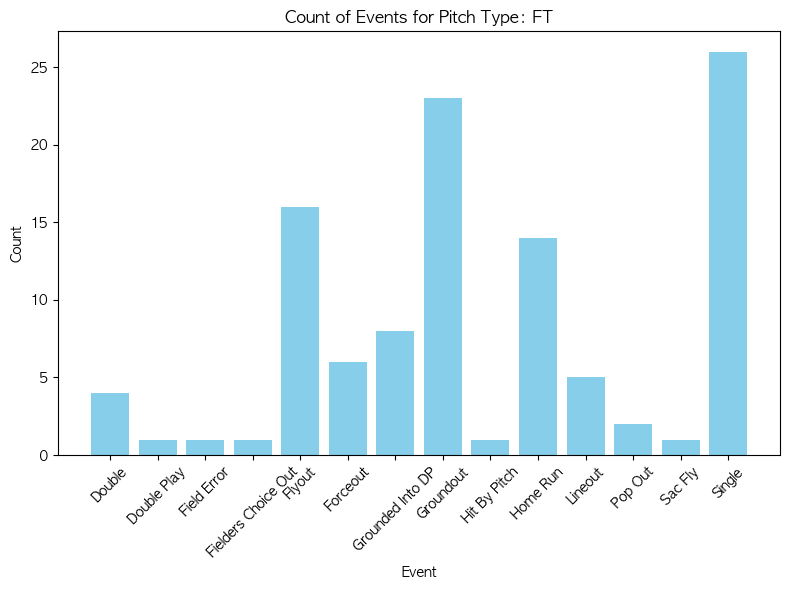

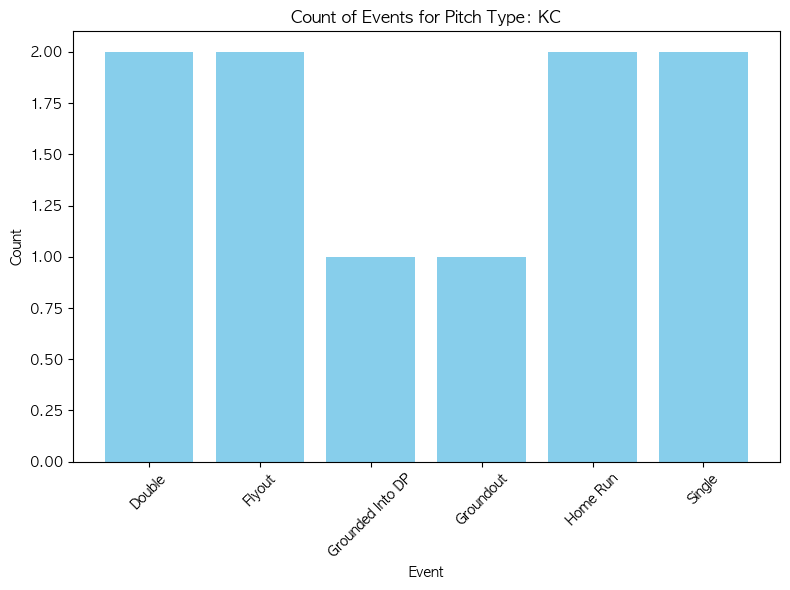

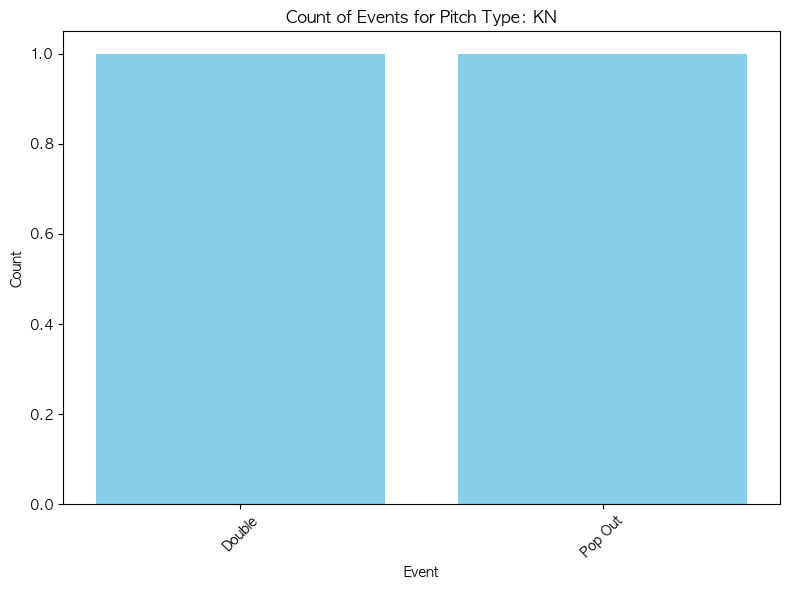

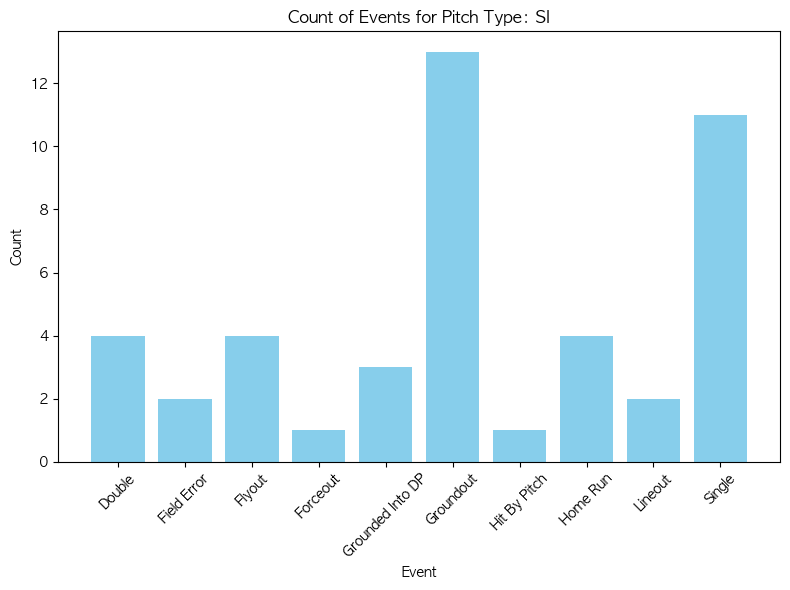

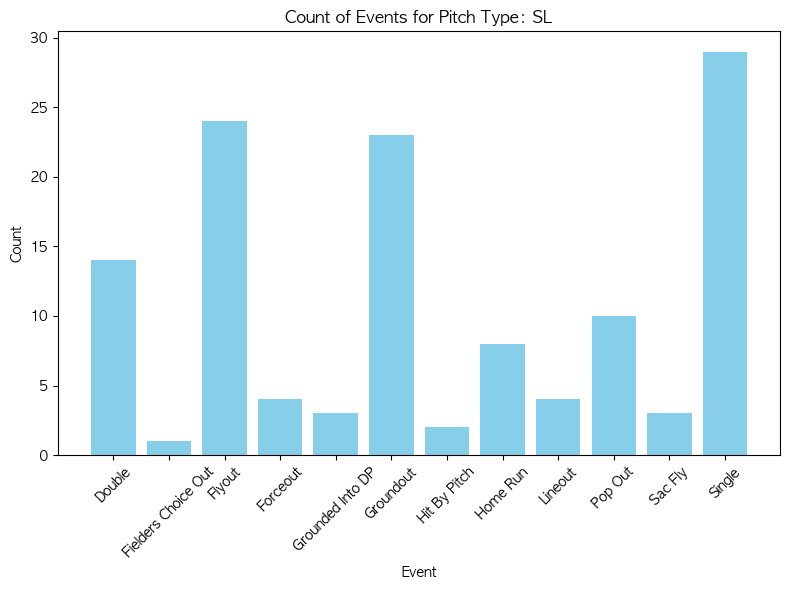

In [54]:
unique_pitch_types = combination_counts['pitch_type'].unique()

# Plot each pitch_type separately
for pitch_type in unique_pitch_types:
  subset = combination_counts[combination_counts['pitch_type'] == pitch_type]
  
  plt.figure(figsize=(8, 6))
  plt.bar(subset['event'], subset['count'], color='skyblue')
  
  plt.title(f'Count of Events for Pitch Type: {pitch_type}')
  plt.xlabel('Event')
  plt.ylabel('Count')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()